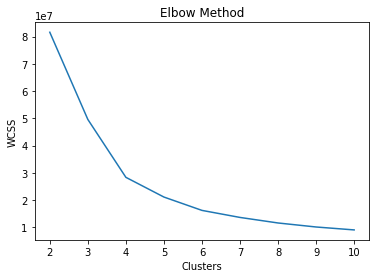

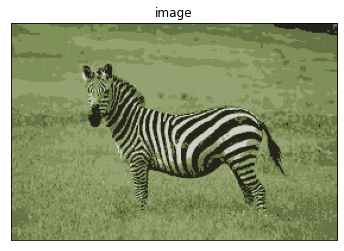

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from util_func import *
def k_means_clust(img, K, max_iter = 10, eps = 1.0 , attempts = 10, flag = cv.KMEANS_PP_CENTERS):
    """Args
    img: color image ( 3 channels)
    K = number of clusters
    By default, max_iter = 10 , eps = 1.0, attempts = 10, k-means++"""
    img = img.reshape((-1,3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    return cv.kmeans(img, K, None, criteria, attempts, flag)


img = cv.imread('images/zebra.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
pixels = img.reshape(-1, 3)

wcss= []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(2, 11))
plt.show()


ret,label, center = k_means_clust(img,5 )
center = np.uint8(center)
res = center[label.flatten()]
quant = res.reshape(img.shape)
plt_img(quant, "image")

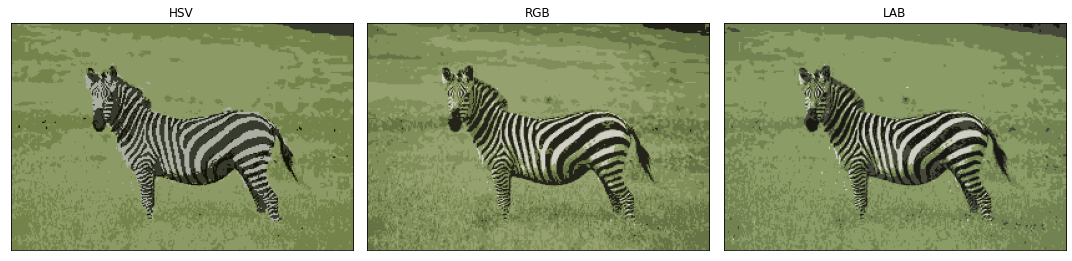

In [152]:
img = cv.imread("images/zebra.jfif")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

ret1,label1, center1 = k_means_clust(img_hsv,5 )
ret2,label2, center2 = k_means_clust(img_rgb,5 )
ret3,label3, center3 = k_means_clust(img_lab,5 )

center1 = np.uint8(center1)
center2 = np.uint8(center2)
center3 = np.uint8(center3)

res1 = center1[label1.flatten()]
res2 = center2[label2.flatten()]
res3 = center3[label3.flatten()]

quant1 = res1.reshape(img_hsv.shape)
quant2 = res2.reshape(img_rgb.shape)
quant3 = res3.reshape(img_lab.shape)

quant_hsv = cv.cvtColor(quant1, cv.COLOR_HSV2RGB)
quant_rgb = quant2
quant_lab = cv.cvtColor(quant3, cv.COLOR_Lab2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(131),plt_img(quant_hsv,"HSV")
plt.subplot(132),plt_img(quant_rgb,"RGB")
plt.subplot(133),plt_img(quant_lab,"LAB")
plt.tight_layout()
plt.show()

##HSV clustering ->LAB clustering -> RGB clustering
#Color seperation at HSV clustering is much better

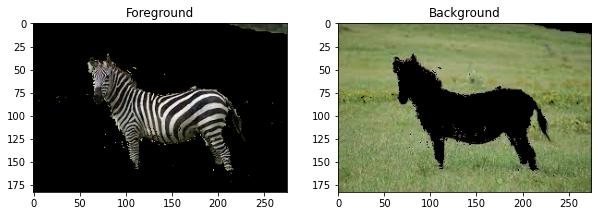

In [153]:
label = label1.reshape(img.shape[:2])

foreground_cluster = 1 
foreground_cluster2 = 3
foreground_cluster3 = 4

foreground_mask = (label == foreground_cluster).astype(np.uint8)
foreground_mask2 = (label == foreground_cluster2).astype(np.uint8)
foreground_mask3 = (label == foreground_cluster3).astype(np.uint8)

foreground = cv.bitwise_and(img, img, mask=foreground_mask +foreground_mask2+foreground_mask3 )
background = cv.bitwise_and(img, img, mask=(1 - foreground_mask - foreground_mask2-foreground_mask3))

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground')
plt.subplot(122), plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB)), plt.title('Background')
plt.show()